# Data Exploration

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style("dark")
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

### Read data

In [2]:
dataset_dir = "./dataset/"
# training set
order_products_train_df = pd.read_csv(dataset_dir + "order_products__train.csv") 
# The order information for all orders before last order
order_products_prior_df = pd.read_csv(dataset_dir + "order_products__prior.csv") 
orders_df = pd.read_csv(dataset_dir +"orders.csv")
products_df = pd.read_csv(dataset_dir + "products.csv")
aisles_df = pd.read_csv(dataset_dir + "aisles.csv")
departments_df = pd.read_csv(dataset_dir + "departments.csv")

In [8]:
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [9]:
# add_to_cart_order: The order that the user add certain product to the basket
order_products_train_df[:3]

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [10]:
# order_dow: The order made on the day of the week
# order_hour_of_day: The order made on the hour of the day
# days_since_prior_order: How long between the current order and the previous order made through instacart
orders_df.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [11]:
# product_name: The name of the product
products_df.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [12]:
# add_to_cart_order: The order for certain product added to the final basket
#                   (from 1 to total number of items purchased in one order) 
# reordered: Wheather the user reorder it or not (True(1) for Yes, False(0) for No)
#            For prediction tasks, this is the field that needed to be determined

order_products_prior_df.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [13]:
# aisle: The aisle name corresponding to the aisle id
aisles_df.head(3)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [14]:
# department: The department name corresponding to the department id
departments_df.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [24]:
len(departments_df)

21

## Distribution of aisles and department

In [15]:
# Merge the products(products_df), aisles(aisles_df) and departments(departments_df) information into order_products_prior_df to combine as one dataframe
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [36]:
cnt_aisles = order_products_prior_df['aisle'].value_counts().head(30)
labels_aisles = cnt_aisles.index
sizes_aisles = cnt_aisles.values

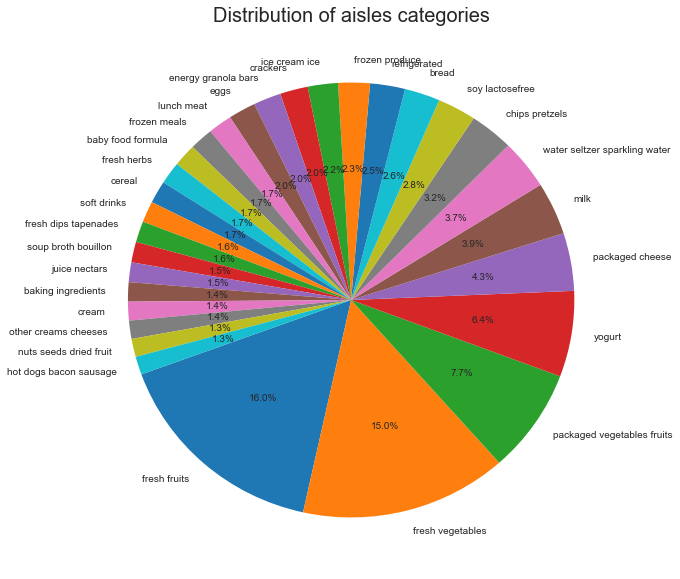

In [38]:
# Pie chart for distribution of aisles
plt.figure(figsize=(10,10))
plt.pie(sizes_aisles, labels=labels_aisles, 
        autopct='%1.1f%%', startangle=200)
plt.title("Distribution of aisles categories", fontsize=20)
plt.show()

In [43]:
cnt_department = order_products_prior_df['department'].value_counts()

labels_aisles = cnt_department.index
sizes_aisles = cnt_department.values

# labels_department = (np.array(cnt_department.index))
# sizes_department = (np.array((cnt_department / cnt_department.sum())*100))

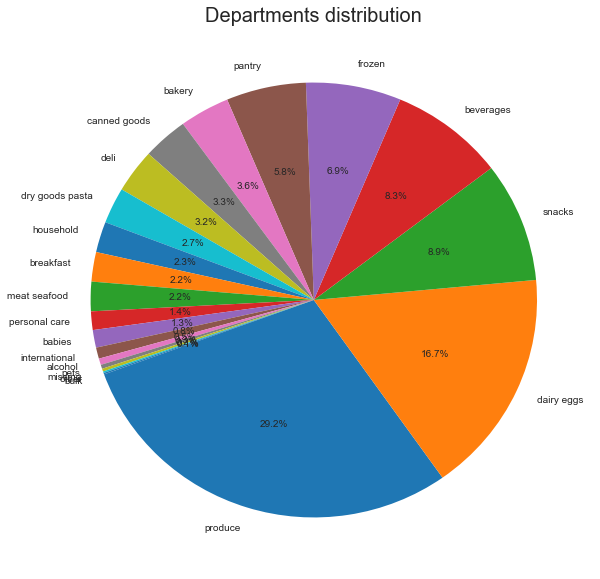

In [44]:
# Pie chart for distribution of department
plt.figure(figsize=(10,10))
plt.pie(sizes_aisles, labels=labels_aisles, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=20)

plt.show()